# Predict Nationality by names

In [1]:
# Modules for Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Modules for Analytic
import pandas as pd
import numpy as np

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Predicting_Nationality_Ethnicity_with_Names_Using_ML/Names_Dataset.csv'

df = pd.read_csv(url)

In [3]:
df.shape

(3238, 3)

In [4]:
df.head()

,Unnamed: 0,names,nationality
0,0,Gershon,yiddish
1,1,Lantz,yiddish
2,2,Zaide,yiddish
3,3,Zalman,yiddish
4,4,Zindel,yiddish


In [5]:
df.columns

Index(['Unnamed: 0', 'names', 'nationality'], dtype='object')

In [6]:
df['nationality'].unique()

array(['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
       'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
       'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
       'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
       'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
       'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
       'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
       'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
       'danish', 'hindi', 'old-german', 'turkish', 'indian',
       'czechoslovakian'], dtype=object)

In [7]:
country = ['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
       'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
       'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
       'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
       'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
       'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
       'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
       'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
       'danish', 'hindi', 'old-german', 'turkish', 'indian',
       'czechoslovakian']

In [8]:
len(country)

50

In [9]:
df.groupby('nationality')['names'].size()

nationality
african             100
african-american    100
american            100
arabic              100
armenian             17
celtic               62
chinese             100
czechoslovakian      38
danish               11
dutch                24
egyptian             30
english             100
finnish              13
french              100
gaelic               87
german              100
greek               100
hawaiian            100
hebrew              100
hindi               100
hungarian            64
indian               25
irish               100
italian             100
japanese            100
korean               16
latin               100
middle-english       45
native-american     100
norse                40
old-english         100
old-french           46
old-german           40
old-norse            28
persian              55
polish               48
polynesian           15
russian              85
sanskrit             28
scandinavian        100
scottish             74
slav

## Visualizing data

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

<AxesSubplot:xlabel='nationality'>

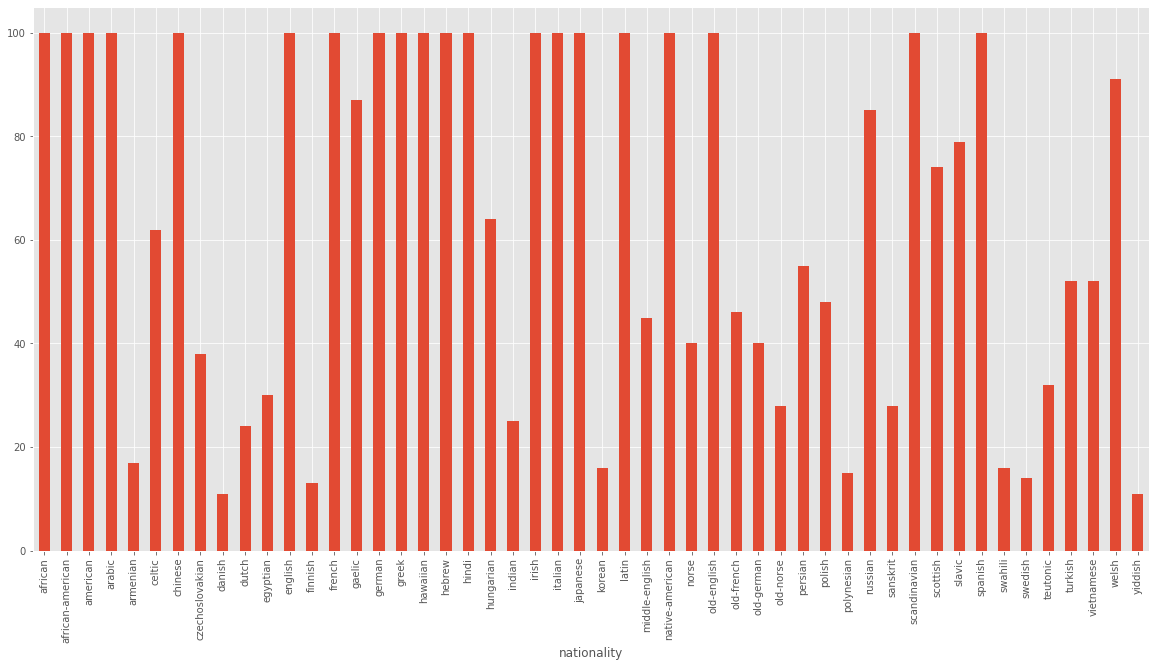

In [11]:
df.groupby('nationality')['names'].size().plot(kind='bar',figsize=(20,10))

In [12]:
# Features
x_features = df['names']
y_label = df['nationality']

In [13]:
# Vectorize Features
cv = CountVectorizer()
x = cv.fit_transform(x_features)

In [14]:
cv.get_feature_names()

['aaliyah',
 'aari',
 'aaron',
 'aase',
 'aba',
 'aban',
 'abbas',
 'abbellonna',
 'abbott',
 'abby',
 'abdiel',
 'abdulaziz',
 'abel',
 'abelard',
 'abeni',
 'abeque',
 'abey',
 'abeytu',
 'abhay',
 'abhijit',
 'abhorson',
 'abia',
 'abiba',
 'abie',
 'abigail',
 'abijah',
 'abira',
 'abital',
 'abmaba',
 'abner',
 'abra',
 'abraham',
 'abrahsa',
 'abriana',
 'abril',
 'absolom',
 'abtin',
 'abuna',
 'acacio',
 'acantha',
 'ace',
 'achachak',
 'achazia',
 'achilles',
 'achuta',
 'ackley',
 'acton',
 'acura',
 'ada',
 'adahy',
 'adalai',
 'adalbert',
 'adalgisa',
 'adalgiso',
 'adalia',
 'adam',
 'adamina',
 'adan',
 'adar',
 'adara',
 'adare',
 'addai',
 'addison',
 'adelaide',
 'adelbert',
 'adelfried',
 'adelino',
 'adelmio',
 'adelmo',
 'adelpha',
 'ademaro',
 'adena',
 'adeodatus',
 'aderes',
 'adger',
 'adham',
 'adia',
 'adie',
 'adin',
 'aditya',
 'adler',
 'adley',
 'admon',
 'adney',
 'adoette',
 'adolfina',
 'adolph',
 'adon',
 'adonis',
 'adora',
 'adrian',
 'adrienne',
 'a

In [15]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size=0.2, random_state=42)

In [16]:
# Build model
nbm = MultinomialNB()
nbm.fit(x_train, y_train)

MultinomialNB()

In [17]:
# Accuracy of model
nbm.score(x_test, y_test)

0.06172839506172839

In [18]:
example_1 = ['Kofi']

In [19]:
vector1 = cv.transform(example_1).toarray()

In [20]:
nbm.predict(vector1)

array(['african'], dtype='<U16')

In [21]:
example_2 = ['Yun', 'Chen', 'Harmonie', 'Vladimir']

In [22]:
vector2 = cv.transform(example_2).toarray()

In [23]:
nbm.predict(vector2)

array(['french', 'chinese', 'french', 'slavic'], dtype='<U16')

## Logistic Regression

In [24]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [25]:
lgr.score(x_test, y_test)

0.06635802469135803

In [26]:
# Single predictions
lgr.predict(vector1)

array(['african'], dtype=object)

In [27]:
# Multiple predictions
lgr.predict(vector2)

array(['french', 'chinese', 'french', 'slavic'], dtype=object)

In [28]:
example_3 = ['Benjamin', 'Natasha', 'Immanuel']

In [29]:
vector3 = cv.transform(example_3).toarray()

In [30]:
lgr.predict(vector3)

array(['french', 'french', 'french'], dtype=object)

## Interpretation of Model

In [31]:
# !pip install eli5

In [32]:
import eli5

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [33]:
eli5.show_weights(lgr, target_names=country)

In [34]:
feature_names = cv.get_feature_names()

In [35]:
eli5.show_weights(lgr, feature_names=feature_names, target_names=country)

## Single Prediction Explanation

In [36]:
ex1 = np.reshape(vector1, (-1*1))

In [37]:
eli5.show_prediction(lgr, ex1, target_names=country)

In [38]:
eli5.show_prediction(lgr, ex1, feature_names=feature_names)

## Save model

In [39]:
import joblib

In [40]:
nationality_nb_model = open('nationality_nb_model.pkl', 'wb')
joblib.dump(nbm, nationality_nb_model)

In [41]:
nationality_nb_model.close()

In [42]:
nationality_lgr_model = open('nationality_lgr_model.pkl', 'wb')
joblib.dump(lgr, nationality_lgr_model)

Reshaped from [link](https://www.youtube.com/watch?v=CKrNvlMqroc&ab_channel=JCharisTech%26J-Secur1ty)